## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

In [2]:
train=pd.read_csv("Training Data.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv("Testing Data.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
original_train=train.copy()
original_test=test.copy()

## Data Exploration

In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

## Handling Missing Values
#### There are two ways to treat the missing values.
>- 1.Delete the Missing Values
>- 2.replace the missing values by another value according to mean,median,mode.

In [17]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

In [18]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

In [20]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [21]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [24]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [25]:
train['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [30]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [31]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [32]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [33]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [34]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [35]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Data Analysis

In [37]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [38]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [39]:
train.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          80
        Yes         32
Male    Yes        369
        No         133
Name: Married, dtype: int64

<AxesSubplot:xlabel='Gender,Married'>

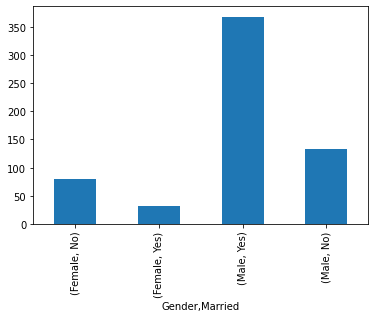

In [40]:
train.groupby('Gender')['Married'].value_counts().plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='count'>

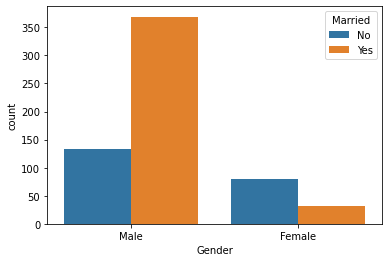

In [41]:
sns.countplot(x = 'Gender',hue='Married', data=train)

## 1. What's the ratio of Male to Female?

In [42]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [43]:
s=train['Gender'].value_counts()

In [44]:
s[0]

502

In [45]:
s[1]

112

In [47]:
ratio=s[0]/s[1]

In [48]:
print('Ratio of Male to Female:',ratio)

Ratio of Male to Female: 4.482142857142857


## 2. How many Males are married and non-married?

>- 369 Males are Married
>- 133 Males are non-married

In [49]:
train.groupby(train['Gender']=='Male')['Married'].value_counts()

Gender  Married
False   No          80
        Yes         32
True    Yes        369
        No         133
Name: Married, dtype: int64

Text(0.5, 1.0, 'Male(True)')

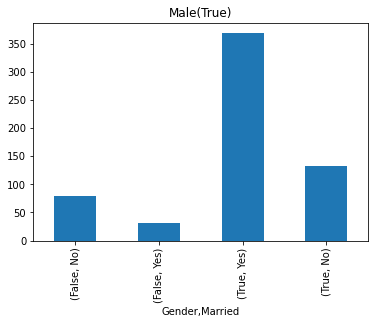

In [50]:
train.groupby(train['Gender']=='Male')['Married'].value_counts().plot.bar()
plt.title('Male(True)')

## 3.How many Females are married and non-married?

>- 32 Females are Married
>- 80 Females are non-married

In [51]:
train.groupby(train['Gender']=='Female')['Married'].value_counts()

Gender  Married
False   Yes        369
        No         133
True    No          80
        Yes         32
Name: Married, dtype: int64

Text(0.5, 1.0, 'Female(True)')

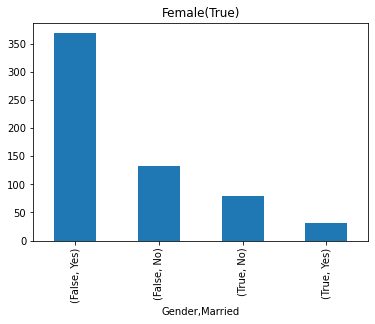

In [52]:
train.groupby(train['Gender']=='Female')['Married'].value_counts().plot.bar()
plt.title('Female(True)')

## 4.How many Males and Females are graduated and non-graduated with respect to their Marital status?

>- married -> 286 Males are Graduated
              83 Males are non graduated
>- non-married -> 102 Males are Graduated
                  31 Males are non graduated

>- married -> 26 Females are Graduated
              6 Females are non graduated
>- non-married -> 66 Females are Graduated
                  14 Females are non graduated

In [53]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [54]:
train.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        388
        Not Graduate    114
Name: Education, dtype: int64

In [55]:
train[train['Gender']=='Male']['Education'].groupby(train['Married']).value_counts()

Married  Education   
No       Graduate        102
         Not Graduate     31
Yes      Graduate        286
         Not Graduate     83
Name: Education, dtype: int64

Text(0.5, 1.0, 'Male')

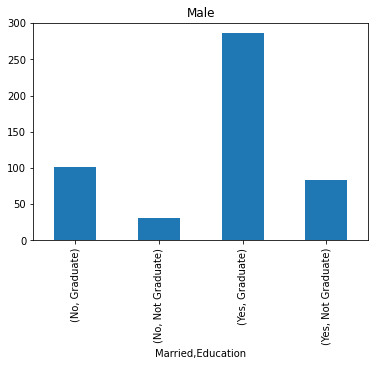

In [56]:
train[train['Gender']=='Male']['Education'].groupby(train['Married']).value_counts().plot.bar()
plt.title('Male')

In [57]:
train[train['Gender']=='Female']['Education'].groupby(train['Married']).value_counts()

Married  Education   
No       Graduate        66
         Not Graduate    14
Yes      Graduate        26
         Not Graduate     6
Name: Education, dtype: int64

Text(0.5, 1.0, 'Female')

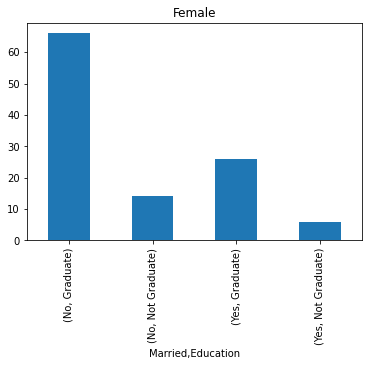

In [58]:
train[train['Gender']=='Female']['Education'].groupby(train['Married']).value_counts().plot.bar()
plt.title('Female')

In [59]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

## 6. Is it a male or a female whose loan amount is the highest?

### Ans.Male

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
train['LoanAmount'].max()

700.0

In [62]:
train[train.LoanAmount==train['LoanAmount'].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


## 7. the specification and information about the applicant who has the highest income?

>- Loan_ID = LP002317
>- Gender = Male
>- Married = Yes
>- Dependents = 3+
>- Education = Graduate
>- self_employes = No
>- ApplicantIncome = 81000
>- LoanAmount = 360
>- Credit_History = 0.0
>- Property_Area = Rural
>- Loan_Status = N


In [63]:
train['ApplicantIncome'].max()

81000

In [64]:
train[train.ApplicantIncome==train['ApplicantIncome'].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


## 5. Which type of encoding will be required to perform on the "Education" column?

### LabelEncoding

In [65]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
enc = LabelEncoder()

In [68]:
train.Education = enc.fit_transform(train.Education)

In [69]:
train.Gender = enc.fit_transform(train.Gender)
train.Married = enc.fit_transform(train.Married)
train.Self_Employed = enc.fit_transform(train.Self_Employed)
train.Property_Area = enc.fit_transform(train.Property_Area)
train.Loan_Status = enc.fit_transform(train.Loan_Status)


In [70]:
train.Dependents = enc.fit_transform(train.Dependents)

In [71]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [72]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [73]:
test.Education = enc.fit_transform(test.Education)
test.Gender = enc.fit_transform(test.Gender)
test.Married = enc.fit_transform(test.Married)
test.Self_Employed = enc.fit_transform(test.Self_Employed)
test.Property_Area = enc.fit_transform(test.Property_Area)
test.Dependents = enc.fit_transform(test.Dependents)

In [74]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


## 8. What all features are you going to consider for the model training and why? (Give the appropriate reason for choosing such features among others)

Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Loan_Amount_Term
>- these are features that i am going to consider for the model trainnig because of feature_importance_ attribute.
>- Reason: using these features my model got higher accuracy rather than using among all features which are present in training dataset.

## Feature Selection

<AxesSubplot:>

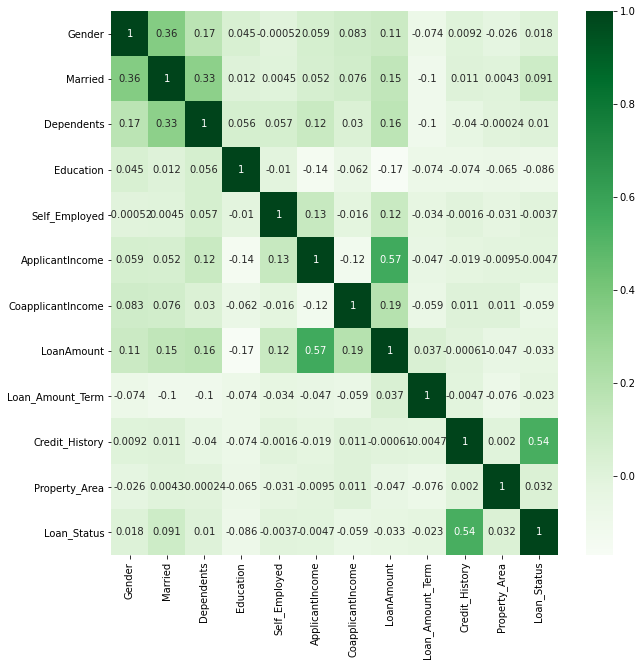

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

In [76]:
train.drop('Loan_ID',axis=1,inplace=True)

In [77]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [78]:
test.drop('Loan_ID',axis=1,inplace=True)

In [79]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [80]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [81]:
model = ExtraTreesClassifier()

In [82]:
model.fit(X,y)

ExtraTreesClassifier()

In [83]:
model.feature_importances_

array([0.02023163, 0.01858246, 0.05721474, 0.02082884, 0.02120274,
       0.18576375, 0.11623844, 0.18419097, 0.04732854, 0.28145088,
       0.04696701])

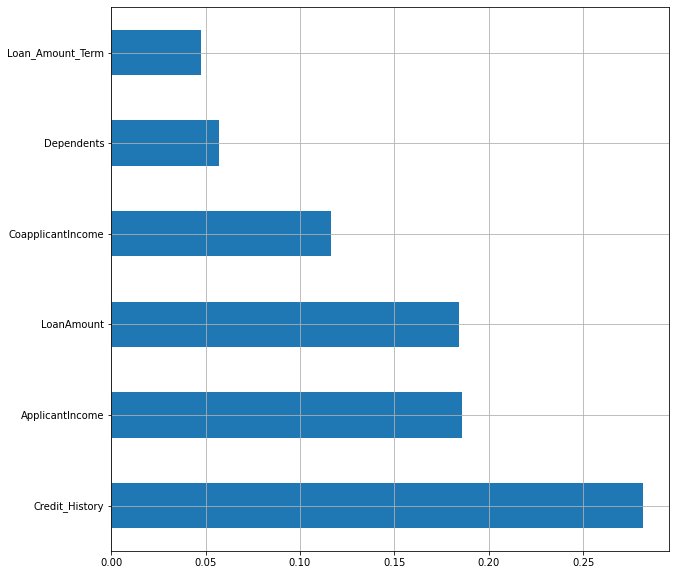

In [84]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_, index=X.columns)
feat.nlargest(6).plot(kind='barh')
plt.grid()

In [85]:
plots = feat.nlargest(6)

In [86]:
plots.index

Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Dependents', 'Loan_Amount_Term'],
      dtype='object')

In [87]:
cols=['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome','Dependents', 'Property_Area']
X_new=X[cols]

In [88]:
X.shape

(614, 11)

In [89]:
X_new.shape

(614, 6)

## Splitting the Data

In [90]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [91]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
288,0,0,0,0,0,4124,0.0,115.0,360.0,1.0,1
105,1,1,1,0,0,3052,1030.0,100.0,360.0,1.0,2
577,1,0,0,0,0,3229,2739.0,110.0,360.0,1.0,2
538,1,1,0,1,0,2917,536.0,66.0,360.0,1.0,0
481,1,1,3,1,0,3095,0.0,113.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
169,1,1,2,0,0,8000,0.0,200.0,360.0,1.0,1
121,0,0,0,0,0,4166,0.0,44.0,360.0,1.0,1
535,1,0,0,1,0,2550,2042.0,126.0,360.0,1.0,0
23,1,1,2,1,0,3365,1917.0,112.0,360.0,0.0,0


In [92]:
x_cv

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
542,0,0,1,0,0,3652,0.0,95.0,360.0,1.0,1
287,1,1,0,0,0,3704,2000.0,120.0,360.0,1.0,0
129,1,1,0,0,0,6080,2569.0,182.0,360.0,1.0,0
336,1,1,1,0,0,5250,688.0,160.0,360.0,1.0,0
248,1,1,1,0,0,2882,1843.0,123.0,480.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
309,1,1,2,1,0,7667,0.0,185.0,360.0,1.0,0
17,0,0,0,0,0,3510,0.0,76.0,360.0,0.0,2
345,1,1,0,0,0,2499,2458.0,160.0,360.0,1.0,1
522,1,1,3,0,1,5677,1424.0,100.0,360.0,1.0,0


In [93]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7783783783783784

In [94]:
x_new_train, x_cv, y_train, y_cv = train_test_split(X_new,y, test_size=0.3,random_state=1)
model = LogisticRegression(random_state=1)
model.fit(x_new_train, y_train)

LogisticRegression()

LogisticRegression()

In [95]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7945945945945946

## Stratified K-fold Cross validation

In [96]:
from sklearn.model_selection import StratifiedKFold
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {}'.format(i,kf.n_splits))
    x_train,x_vl = X.loc[train_index],X.loc[test_index]
    y_train,y_vl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(x_train,y_train)
    pred_test=model.predict(x_vl)
    log_score=accuracy_score(y_vl,pred_test)
    mean += log_score
    print ('accuracy_score',log_score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(x_vl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.8094095695055312


In [97]:
from sklearn.model_selection import StratifiedKFold
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {}'.format(i,kf.n_splits))
    x_train,x_vl = X.loc[train_index],X.loc[test_index]
    y_train,y_vl = y[train_index],y[test_index]
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    pred_test=model.predict(x_vl)
    dt_score=accuracy_score(y_vl,pred_test)
    mean += dt_score
    print ('accuracy_score',dt_score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(x_vl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.6666666666666666

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.6829268292682927

4 of kfold 5
accuracy_score 0.6991869918699187

5 of kfold 5
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.6937891510062641


In [98]:
from sklearn.model_selection import StratifiedKFold
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {}'.format(i,kf.n_splits))
    x_train,x_vl = X.loc[train_index],X.loc[test_index]
    y_train,y_vl = y[train_index],y[test_index]
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    pred_test=model.predict(x_vl)
    rf_score=accuracy_score(y_vl,pred_test)
    mean += rf_score
    print ('accuracy_score',rf_score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(x_vl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7704918032786885

 Mean Validation Accuracy 0.8045048647207784


## 9. Which model are you going to choose and define the reason for going with the same     model?

I am going to choose Logistic Regression Because it gives higher accuracy than decision tree classifier and Random Forest classifier

## Model Selection

In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score': [log_score, dt_score, rf_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.786885
2,Random Forest,0.770492
1,Decision Tree,0.680328


## 10. Have you performed the Hyper Parameter Tuning?

NO

## 11. Compare the Actual results with the Predicted results

In [100]:
final = pd.DataFrame({"Actual":y_cv, "Predicted":pred_cv})

In [101]:
final

,Actual,Predicted
533,0,1
544,1,1
41,1,1
148,0,1
111,1,1
...,...,...
180,0,0
491,1,1
42,1,1
530,1,1


<AxesSubplot:>

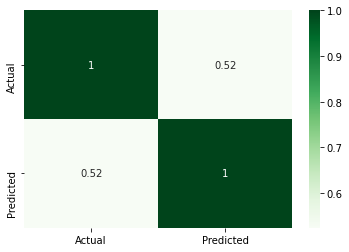

In [102]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

## 12. What's the accuracy of your model?

## Performance metrices

In [103]:
cm = confusion_matrix(y_cv, pred_cv)
cm

array([[ 25,  36],
       [  2, 122]], dtype=int64)

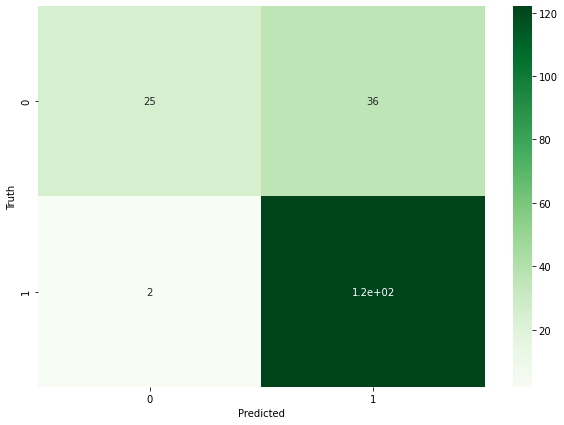

In [104]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [105]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

## 13. In order to improve the accuracy, what more approaches can be done?

In order to improve the accuracy i have to perform hyperparameter tuning

## 14.What can you conclude with respect to the data?

>-  number of males are more than number of females
>-  number of males who are married is more than number of males who are non married
>-  number of females who are graduated >= number of females who are not graduated
>-  number of females who are married <= number of females who are not married
>-  In this data, after feature selection we can get more accuracy

In [106]:
import pickle
with open('loan_eligibility_model.pickle','wb') as f:
    pickle.dump(model,f)